In [1]:
import numpy as np
import matplotlib.pyplot as plt
import geopandas as gpd
from shapely.geometry import Point, Polygon
import contextily as ctx
from modules.utils import *

# Seismic source mapping visualization

In [2]:
# Load the maps
mask1 = np.load('data/mask_region1.npz')['mask']
map1 = np.load('data/map_region1.npz')['data']
mask2 = np.load('data/mask_region2.npz')['mask']
map2 = np.load('data/map_region2.npz')['data']
mask3 = np.load('data/mask_region3.npz')['mask']
map3 = np.load('data/map_region3.npz')['data']
bounds_gps1 = (-121.8051331642167, 37.29248708462131, -121.76855442520541, 37.31226844216871)
bounds_gps2 = (-121.847685, 37.275483, -121.821042042516, 37.29031663541242)
bounds_gps3 = (-121.83583333333333, 37.24638888888889, -121.79861111111111, 37.276944444444446)

/home/jingxiao/anaconda3/envs/das/lib/python3.8/site-packages/pyproj/crs/crs.py:141: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  in_crs_string = _prepare_from_proj_string(in_crs_string)
/home/jingxiao/sjc_das/urban_das/modules/utils.py:1033: FutureWarning: This function is deprecated. See: https://pyproj4.github.io/pyproj/stable/gotchas.html#upgrading-to-pyproj-2-from-pyproj-1
  lon, lat = pyproj.transform(proj_transform, lonlat_transform, x, 0)
/home/jingxiao/sjc_das/urban_das/modules/utils.py:1041: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels([round(x_to_lon(x), 2) for x in ax.get_xticks()])
/home/jingxiao/sjc_das/urban_das/modules/utils.py:1037: FutureWarning: This function is deprecated. See: https://pyproj4.gith

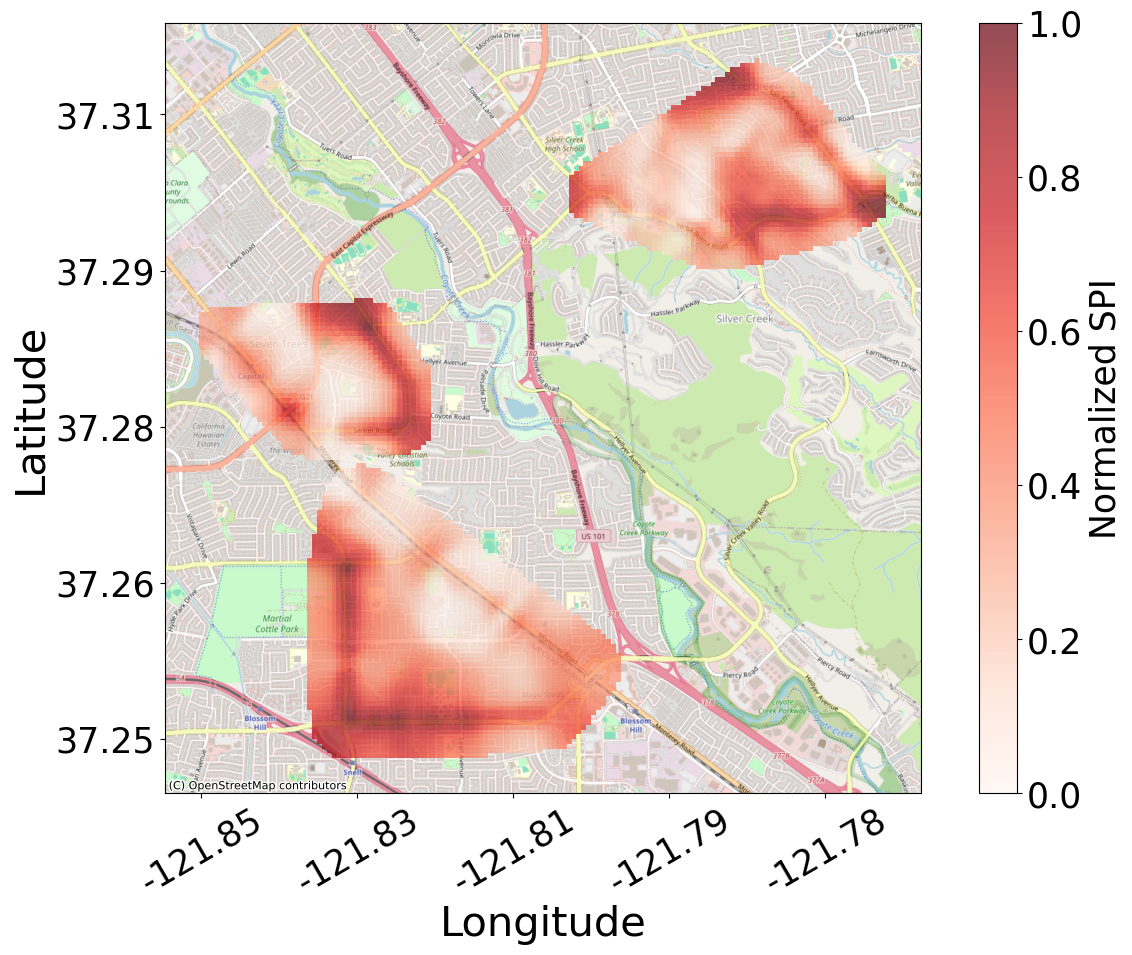

In [3]:
gdf = create_geodataframe(map1, mask1, bounds_gps1, crs='EPSG:4326')
gdf_st = create_geodataframe(map2, mask2, bounds_gps2, crs='EPSG:4326')
gdf_eg = create_geodataframe(map3, mask3, bounds_gps3, crs='EPSG:4326')
vmin = min(gdf['intensity'].min(), gdf_st['intensity'].min(), gdf_eg['intensity'].min())
vmax = max(gdf['intensity'].max(), gdf_st['intensity'].max(), gdf_eg['intensity'].max())

alpha=0.7
cmap = 'Reds'

fig, ax = plt.subplots(figsize=(15,10))
gdf.set_crs(epsg=4326, inplace=True)
gdf.to_crs(epsg=3857).plot(ax=ax, column='intensity', legend=False, cmap=cmap, alpha=alpha)
gdf_st.set_crs(epsg=4326, inplace=True)
gdf_st.to_crs(epsg=3857).plot(ax=ax, column='intensity', legend=False, cmap=cmap, alpha=alpha)
gdf_eg.set_crs(epsg=4326, inplace=True)
gdf_eg.to_crs(epsg=3857).plot(ax=ax, column='intensity', legend=False, cmap=cmap, alpha=alpha)

sm = plt.cm.ScalarMappable(cmap=cmap, norm=plt.Normalize(vmin=0, vmax=1))
sm._A = []
cbar = fig.colorbar(sm, ax=ax, alpha=alpha)
cbar.set_label('Normalized SPI',size=25)
for t in cbar.ax.get_yticklabels():
     t.set_fontsize(25)
ctx.add_basemap(ax, source=ctx.providers.OpenStreetMap.Mapnik)
add_lat_lon_ticks(ax)
plt.xlabel('Longitude',fontsize=30)
plt.ylabel('Latitude',fontsize=30)
plt.yticks(fontsize=25)
plt.xticks(rotation=30,fontsize=25)
plt.tight_layout
plt.show()